In [1]:
#Importing necessary libraries for processing and visualizing the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
#Loading the dataset(Train and Test datasets) as dataframe
df_train=pd.read_csv("dataset/Data_Train.csv")
df_test=pd.read_csv("dataset/Test_set.csv")
print("Total records in train set:",len(df_train))
print("Total records in test set:",len(df_test))

Total records in train set: 10683
Total records in test set: 2671


In [3]:
#Concatenating the datasets into a single dataframe and storing it in a file
df=pd.concat([df_train,df_test])
df.to_csv("combined_data.csv",sep=',')
df = pd.read_csv('combined_data.csv')

In [4]:
#Displaying top 5 records in the dataframe
df.head()

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [5]:
#Cleaning Step 1: Drop Unnamed: 0 column
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [6]:
#Getting the datatypes of each attribute in the dataframe
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [7]:
#Desciptive analysis of the dataframe
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
#Checking for any Null values in the dataframe
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [9]:
#Cleaning Step 2: Remove 2 na rows from Route and Total_Stops, Price is not removed because it can be used for testing
df=df.dropna(subset=['Route','Total_Stops'])

In [10]:
#Checking for na rows after removal
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dtype: int64

In [11]:
#Cleaning Step 3: Dropping Duplicate Values
print("Total duplicate records:",df.duplicated().sum())
df=df.drop_duplicates()

Total duplicate records: 246


In [12]:
#Cleaning Step 4: Clean Source City name Column to remove spelling mistakes

print(df['Source'].unique())
corrections = {'Kolkato': 'Kolkata', 'Delhe': 'Delhi'}
df['Source'] = df['Source'].replace(corrections)
print(df['Source'].unique())

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


In [13]:
#Cleaning step 5: Changing New Delhi in destination to Delhi 

df.loc[df['Destination'] == 'New Delhi', 'Destination'] = 'Delhi'
print(df['Destination'].unique())

['Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Hyderabad']


In [14]:
#Cleaning Step 6: up Airline Name Column to remove spelling mistakes

print(df['Airline'].unique())
corrections = {'Jet Airwys': 'Jet Airways', 'Indi-Go': 'IndiGo'}
df['Airline'] = df['Airline'].replace(corrections)
print(df['Airline'].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


In [15]:
#Cleaning Step 7: Converting total duration to a Numeric datatype

def convert_to_mins(s):
    if('h' not in s):
        mins=s.strip('m')
        hrs=0
    elif('m' not in s):
        hrs=s.strip('h')
        mins=0
    else:
        hrs,mins=s.split('h')
        mins=mins.strip().strip('m')
    total_mins=int(hrs)*60+int(mins)
    return total_mins
df['Duration_mins']=df['Duration'].apply(convert_to_mins)
#df['Duration']=df['Duration'].apply(convert_to_mins)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_mins
0,IndiGo,24/03/2019,Banglore,Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,325
4,IndiGo,01/03/2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,285


In [16]:
#Cleaning Step 6: Cleaning the Date of Journey Columns
df['Date_of_Journey'].str.split('/')

df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

corrections = {'03': 'March', '04': 'April', '05': 'May', '06': 'June'}
df['Month'] = df['Month'].replace(corrections)
df['Month'].unique()

array(['March', 'May', 'June', 'April'], dtype=object)

In [17]:
#Cleaning Step 8: Extracting Time from Data-Time Column

df['Duration_Timestamp'] = ''
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.time
df['departure_datetime'] = pd.to_datetime(df['Date_of_Journey'].astype(str) + ' ' + df['Dep_Time'].astype(str))

# Function to convert time string to timedelta
def parse_duration(duration_str):
    parts = duration_str.split()
    total_minutes = 0
    for part in parts:
        if 'h' in part:
            total_minutes += int(part[:-1]) * 60
        elif 'm' in part:
            total_minutes += int(part[:-1])
    return pd.Timedelta(minutes=total_minutes)

df['Duration_Timestamp'] = df['Duration'].apply(parse_duration)

In [18]:
#Getting top 5 records in duration_timestamp
df['Duration_Timestamp'].head()

0   0 days 02:50:00
1   0 days 07:25:00
2   0 days 19:00:00
3   0 days 05:25:00
4   0 days 04:45:00
Name: Duration_Timestamp, dtype: timedelta64[ns]

In [19]:
# Create Arrival Date Time Column with Timestamp
df['arrival_datetime'] = df['departure_datetime'] + df['Duration_Timestamp']
df['arrival_datetime'].head()

0   2019-03-25 01:10:00
1   2019-01-05 13:15:00
2   2019-09-07 04:25:00
3   2019-12-05 23:30:00
4   2019-01-03 21:35:00
Name: arrival_datetime, dtype: datetime64[ns]

In [20]:
#Cleaning Step 9: Converting Total Stops to numerical datatype
def conv_tot_stops(s):
    if(s=='non-stop'):
        return 0
    else:
        stop=s.split()
        return int(stop[0])
df['Total_Stops']=df['Total_Stops'].apply(conv_tot_stops)

In [21]:
print(df['Total_Stops'])

0        0
1        2
2        2
3        1
4        1
        ..
13349    1
13350    0
13351    1
13352    1
13353    1
Name: Total_Stops, Length: 13107, dtype: int64


In [22]:
#Cleaning Step 10: Encoding Airline Name
label_encoder = LabelEncoder()
df['Airline_LabelEncoded'] = label_encoder.fit_transform(df['Airline'])

In [23]:
#Cleaning Step 11: Encoding Source City Name
label_encoder = LabelEncoder()
df['Source_LabelEncoded'] = label_encoder.fit_transform(df['Source'])

In [24]:
#Cleaning Step 12: Encoding Destination City Name
label_encoder = LabelEncoder()
df['Destination_LabelEncoded'] = label_encoder.fit_transform(df['Destination'])

In [25]:
#Cleaning Step 13: Encoding Destination City Name
label_encoder = LabelEncoder()
df['Duration_LabelEncoded'] = label_encoder.fit_transform(df['Duration'])

In [26]:
#Cleaning Step 14: Encoding Destination City Name
label_encoder = LabelEncoder()
df['Additional_Info_LabelEncoded'] = label_encoder.fit_transform(df['Additional_Info'])

In [27]:
#Function to detect outliers in specific column
def detect_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Detecting outliers in the 'Value' column
outliers = detect_outliers_iqr(df['Price'])
print("Outliers:")
print(outliers)
print(len(outliers))

Outliers:
123      27430.0
396      36983.0
486      26890.0
510      26890.0
597      25139.0
          ...   
10353    24210.0
10364    57209.0
10383    26890.0
10439    31825.0
10511    26480.0
Name: Price, Length: 94, dtype: float64
94


In [28]:
df.shape

(13107, 23)

In [29]:
# Function to detect outliers using IQR method and removing it
def remove_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    filtered_data = df[(df[column.name] >= lower_bound) & (df[column.name] <= upper_bound)]
    return filtered_data

# Removing outliers from the 'Value' column
df_cleaned = remove_outliers_iqr(df['Price'])
print("Cleaned DataFrame:")
print(df_cleaned)

Cleaned DataFrame:
           Airline Date_of_Journey    Source Destination  \
0           IndiGo      2019-03-24  Banglore       Delhi   
1        Air India      2019-01-05   Kolkata    Banglore   
2      Jet Airways      2019-09-06     Delhi      Cochin   
3           IndiGo      2019-12-05   Kolkata    Banglore   
4           IndiGo      2019-01-03  Banglore       Delhi   
...            ...             ...       ...         ...   
10678     Air Asia      2019-09-04   Kolkata    Banglore   
10679    Air India      2019-04-27   Kolkata    Banglore   
10680  Jet Airways      2019-04-27  Banglore       Delhi   
10681      Vistara      2019-01-03  Banglore       Delhi   
10682    Air India      2019-09-05     Delhi      Cochin   

                       Route  Dep_Time  Arrival_Time Duration  Total_Stops  \
0                  BLR ? DEL  22:20:00  01:10 22 Mar   2h 50m            0   
1      CCU ? IXR ? BBI ? BLR  05:50:00         13:15   7h 25m            2   
2      DEL ? LKO ? BOM ? C

In [30]:
#Overwriting the cleaned dataframe to variable 'df'
df = df_cleaned

In [31]:
#Exploratory Data Analytics

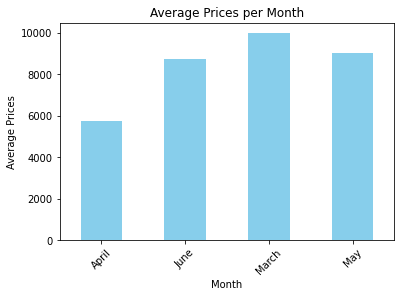

In [32]:
#EDA 1: Avg Prices per month
average_prices = df.groupby('Month')['Price'].mean()

# Plot the bar graph
average_prices.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Prices')
plt.title('Average Prices per Month')
plt.xticks(rotation=45) 
plt.show()


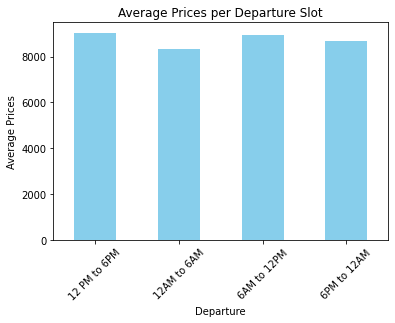

In [33]:
#EDA 2: Average Prices per Departure Time Slot
def time_slot(time_value):
    time_obj = time_value.time()
    
    if time_obj >= pd.Timestamp('00:00:00').time() and time_obj <= pd.Timestamp('06:00:00').time():
        return '12AM to 6AM'
    elif time_obj > pd.Timestamp('06:00:00').time() and time_obj <= pd.Timestamp('12:00:00').time():
        return '6AM to 12PM'
    elif time_obj > pd.Timestamp('12:00:00').time() and time_obj <= pd.Timestamp('18:00:00').time():
        return '12 PM to 6PM'
    else:
        return '6PM to 12AM'
    
df['departure_slot'] = df['departure_datetime'].apply(time_slot)
df['arrival_slot'] = df['arrival_datetime'].apply(time_slot)

df['day_of_departure'] = df['departure_datetime'].dt.strftime('%A')
df['day_of_arrival'] = df['arrival_datetime'].dt.strftime('%A')

average_prices = df.groupby('departure_slot')['Price'].mean()
# Plotting the bar graph
average_prices.plot(kind='bar', color='skyblue')
plt.xlabel('Departure')
plt.ylabel('Average Prices')
plt.title('Average Prices per Departure Slot')
plt.xticks(rotation=45) 
plt.show()

In [34]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,arrival_datetime,Airline_LabelEncoded,Source_LabelEncoded,Destination_LabelEncoded,Duration_LabelEncoded,Additional_Info_LabelEncoded,departure_slot,arrival_slot,day_of_departure,day_of_arrival
0,IndiGo,2019-03-24,Banglore,Delhi,BLR ? DEL,22:20:00,01:10 22 Mar,2h 50m,0,No info,...,2019-03-25 01:10:00,3,0,2,242,8,6PM to 12AM,12AM to 6AM,Sunday,Monday
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50:00,13:15,7h 25m,2,No info,...,2019-01-05 13:15:00,1,3,0,342,8,12AM to 6AM,12 PM to 6PM,Saturday,Saturday
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25:00,04:25 10 Jun,19h,2,No info,...,2019-09-07 04:25:00,4,2,1,106,8,6AM to 12PM,12AM to 6AM,Friday,Saturday
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05:00,23:30,5h 25m,1,No info,...,2019-12-05 23:30:00,3,3,0,317,8,6PM to 12AM,6PM to 12AM,Thursday,Thursday
4,IndiGo,2019-01-03,Banglore,Delhi,BLR ? NAG ? DEL,16:50:00,21:35,4h 45m,1,No info,...,2019-01-03 21:35:00,3,0,2,309,8,12 PM to 6PM,6PM to 12AM,Thursday,Thursday


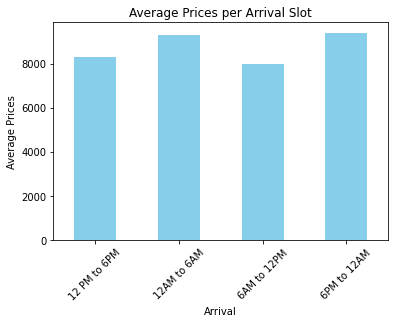

In [35]:
#EDA 3: Average Prices per Arrival Time Slot

average_prices = df.groupby('arrival_slot')['Price'].mean()
# Plotting the bar graph
average_prices.plot(kind='bar', color='skyblue')
plt.xlabel('Arrival')
plt.ylabel('Average Prices')
plt.title('Average Prices per Arrival Slot')
plt.xticks(rotation=45) 
plt.show()

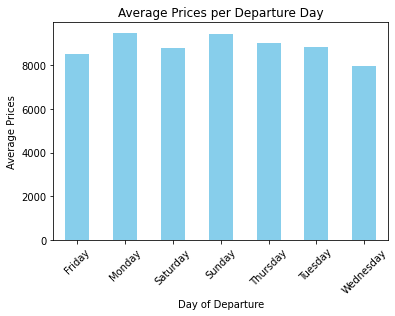

In [36]:
#EDA 4: Average Prices per Day of the Week
average_prices = df.groupby('day_of_departure')['Price'].mean()
# Plotting the bar graph
average_prices.plot(kind='bar', color='skyblue')
plt.xlabel('Day of Departure')
plt.ylabel('Average Prices')
plt.title('Average Prices per Departure Day')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.show()

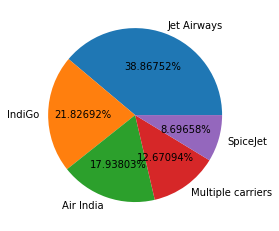

In [37]:
#EDA 5: Share of Flights by Airline
plt.pie(df['Airline'].value_counts().values[:5], labels=df['Airline'].value_counts().index[:5], autopct='%1.5f%%');

In [38]:
df['Duration_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_mins, Length: 10368, dtype: int64

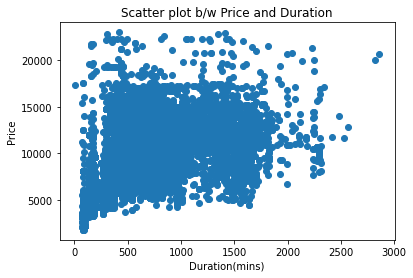

In [39]:
#EDA 6: Price vs Duration of Flight
plt.scatter(df['Duration_mins'][:10684],df['Price'][:10684])
plt.xlabel("Duration(mins)")
plt.ylabel("Price")
plt.title("Scatter plot b/w Price and Duration")
plt.show()

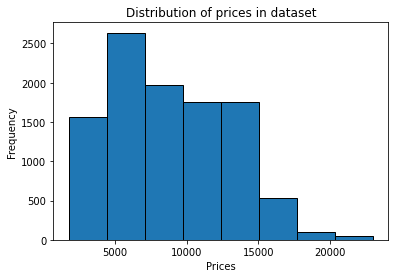

In [40]:
#EDA 7: Prices Histogram
plt.hist(df['Price'], bins=8, edgecolor='black')  
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Distribution of prices in dataset')
plt.show()

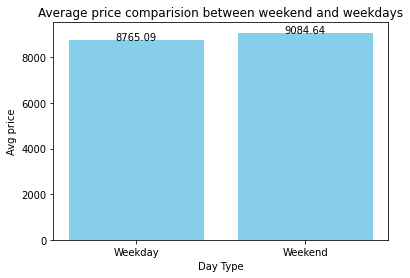

In [41]:
#EDA 8: Average price on weekdays and weekends

df['day_type'] = df['day_of_departure'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
avg_vals=df.groupby('day_type')['Price'].mean()
plt.bar(['Weekday','Weekend'],avg_vals.values, color='skyblue')
for i,val in enumerate(avg_vals):
  plt.text(i,val,str(round(val, 2)),ha='center')
plt.xlabel("Day Type")
plt.ylabel("Avg price")
plt.title("Average price comparision between weekend and weekdays")
plt.show()

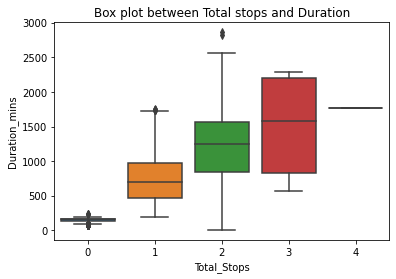

In [42]:
# EDA 9: Box plot between total stops and duration in mins

plt.title("Box plot between Total stops and Duration")
sns.boxplot(data=df,x=df['Total_Stops'],y=df['Duration_mins'])
plt.show()

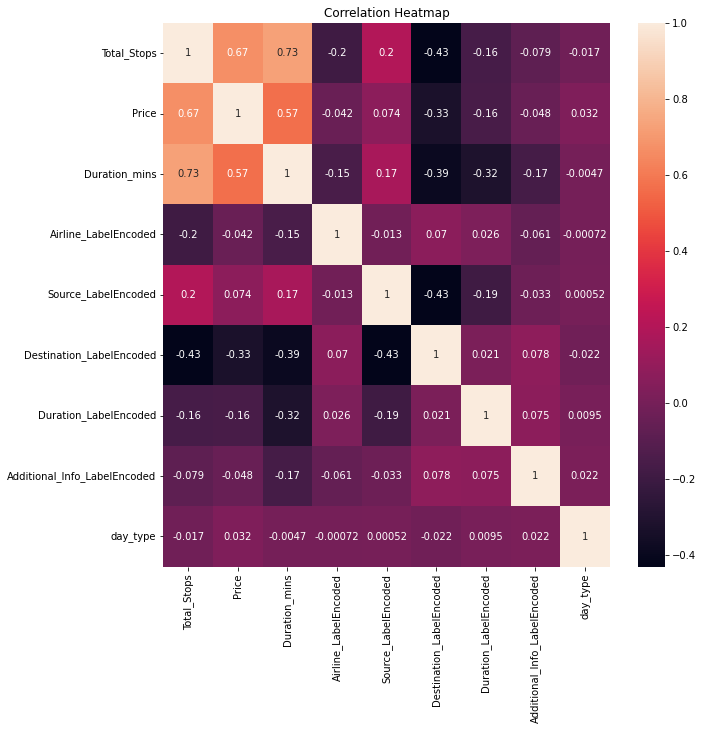

In [43]:
#EDA 10: Correlation heatmap between different numerical features
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()